In [ ]:
!pip install scikit-image==0.18.1

In [ ]:
!pip install imutils

In [ ]:
!pip install opencv-contrib-python

In [4]:
from imutils.perspective import four_point_transform
from skimage import exposure
import numpy as np
from matplotlib import pyplot as plt
import argparse
import imutils
import cv2
import sys

In [ ]:
# find_color_card: finding the color card from a given image and return the flatterned color card

In [3]:
def find_color_card(image):
    # load the ArUCo dictionary, grab the ArUCo parameters, and
    # detect the markers in the input image
    
    arucoDict = cv2.aruco.Dictionary_get(cv2.aruco.DICT_ARUCO_ORIGINAL)
    arucoParams = cv2.aruco.DetectorParameters_create()
    (corners, ids, rejected) = cv2.aruco.detectMarkers(image,
        arucoDict, parameters=arucoParams)
    try:
        # otherwise, we've found the four ArUco markers, so we can
        # continue by flattening the ArUco IDs list
        ids = ids.flatten()
        # extract the top-left marker
        i = np.squeeze(np.where(ids == 923))
        topLeft = np.squeeze(corners[i])[0]
        # extract the top-right marker
        i = np.squeeze(np.where(ids == 1001))
        topRight = np.squeeze(corners[i])[1]
        # extract the bottom-right marker
        i = np.squeeze(np.where(ids == 241))
        bottomRight = np.squeeze(corners[i])[2]
        # extract the bottom-left marker
        i = np.squeeze(np.where(ids == 1007))
        bottomLeft = np.squeeze(corners[i])[3]
    # we could not find color correction card, return
    except:
        return None
    # build our list of reference points and apply a perspective
    # transform to obtain a top-down, bird’s-eye view of the color
    # matching card
    cardCoords = np.array([topLeft, topRight, bottomRight, bottomLeft])
    card = four_point_transform(image, cardCoords)
    # return the color matching card to the calling function
    return card

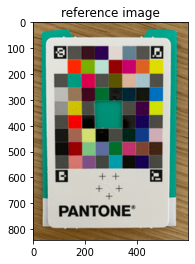

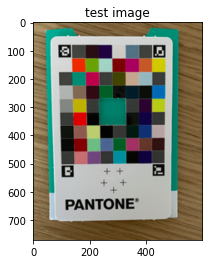

In [10]:
# load reference image and input images
ref = cv2.imread('refference.png')
image = cv2.imread('img1.png')

# resize
ref = imutils.resize(ref, width=600)
image = imutils.resize(image, width=600)

# display
plt.title('reference image')
plt.imshow(cv2.cvtColor(ref, cv2.COLOR_BGR2RGB))
plt.show()

plt.title('test image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

#cv2.imshow("Reference", ref)
#cv2.imshow("Input", image)

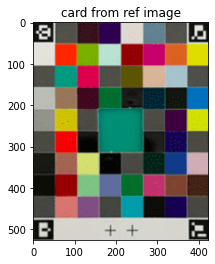

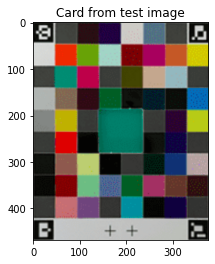

In [12]:
# find the color matching card in each image

refCard = find_color_card(ref)
imageCard = find_color_card(image)

# if the color matching card is not found in either the reference or test
if refCard is None or imageCard is None:
    print("[INFO] could not find color matching card in both images")

# show the color matching card in the reference image and input image

plt.title('card from ref image')
plt.imshow(cv2.cvtColor(refCard, cv2.COLOR_BGR2RGB))
plt.show()

plt.title('Card from test image')
plt.imshow(cv2.cvtColor(imageCard, cv2.COLOR_BGR2RGB))
plt.show()

[INFO] matching images...


/tmp/ipykernel_24015/468862840.py:6: FutureWarning: `multichannel` is a deprecated argument name for `match_histograms`. It will be removed in version 1.0. Please use `channel_axis` instead.
  imageCard = exposure.match_histograms(imageCard, refCard, multichannel=True)


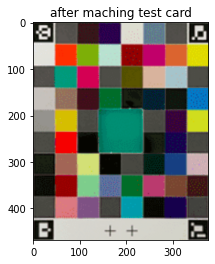

In [13]:
# apply histogram matching from the color matching card in the
# reference image to the color matching card in the input image

print("[INFO] matching images...")

imageCard = exposure.match_histograms(imageCard, refCard, multichannel=True)

# show our input color matching card after histogram matching
plt.title('after maching test card')
plt.imshow(cv2.cvtColor(imageCard, cv2.COLOR_BGR2RGB))
plt.show()

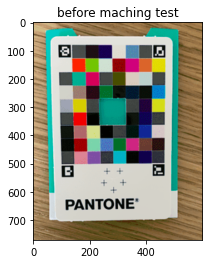

/tmp/ipykernel_24015/128920341.py:6: FutureWarning: `multichannel` is a deprecated argument name for `match_histograms`. It will be removed in version 1.0. Please use `channel_axis` instead.
  image = exposure.match_histograms(image, ref, multichannel=True)


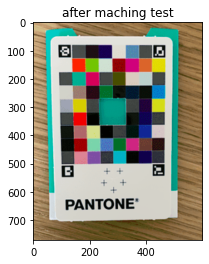

In [15]:
plt.title('before maching test')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()


image = exposure.match_histograms(image, ref, multichannel=True)
# show our input color matching card after histogram matching
plt.title('after maching test')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()